

##### Test-Train Split:
In this scenario, the available dataset consists of 3000 images for each class (Normal and COPD). The dataset is split into training and testing sets using an 80-20 ratio. This means 2400 images per class are used for training, and 600 images per class are used for testing. Splitting the data helps in evaluating the model's performance on unseen data and prevents overfitting.


Note:This problem statement and dataset is taken from this Kaggle competition.
Dependencies
Jupyter notebook
Tensorflow 1.10
Python 3.6
Matplotlib
Seaborn
Scikit-Learn
Pandas
Numpy
Install dependencies using conda


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'numpy'

In [ ]:
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2

In [ ]:
DATASET_DIR = 'copd_resources'

##### Data Preprocessing and Loading
In this cell, data preprocessing steps are defined using the ImageDataGenerator class from Keras. It includes rescaling, shear range, zoom range, and horizontal flipping for data augmentation. Then, two generators (train_generator and validation_generator) are created for loading images from the train and test directories, respectively.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'test'),
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


##### Model Architecture Definition
This cell defines the architecture of the CNN model using the Sequential API from Keras. It consists of four pairs of Conv2D and MaxPooling2D layers followed by a Flatten layer and two Dense layers. Dropout regularization is also applied to reduce overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### Model Compilation and Training
The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric. Then, the model is trained using the 'fit' method, providing training and validation data generators, steps per epoch, and validation steps.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10
163/163 [==============================] - 275s 2s/step - loss: 0.4105 - accuracy: 0.8200 - val_loss: 0.4059 - val_accuracy: 0.8207
Epoch 2/10
163/163 [==============================] - 233s 1s/step - loss: 0.2475 - accuracy: 0.8953 - val_loss: 0.4667 - val_accuracy: 0.8240
Epoch 3/10
163/163 [==============================] - 231s 1s/step - loss: 0.2009 - accuracy: 0.9191 - val_loss: 0.5043 - val_accuracy: 0.8405
Epoch 4/10
163/163 [==============================] - 239s 1s/step - loss: 0.1883 - accuracy: 0.9254 - val_loss: 0.3748 - val_accuracy: 0.8684
Epoch 5/10
163/163 [==============================] - 234s 1s/step - loss: 0.1635 - accuracy: 0.9411 - val_loss: 0.3645 - val_accuracy: 0.8766
Epoch 6/10
163/163 [==============================] - 235s 1s/step - loss: 0.1586 - accuracy: 0.9427 - val_loss: 0.3062 - val_accuracy: 0.8997
Epoch 7/10
163/163 [==============================] - 235s 1s/step - loss: 0.1568 - accuracy: 0.9411 - val_loss: 0.5019 - val_accuracy: 0.8586

In [ ]:
model.save("copd_detection_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('copd_detection_model.h5')

##### Image Prediction
This cell demonstrates how to load an image, preprocess it, and make predictions using the trained model. It loads an image from the specified path, preprocesses it, predicts the class probability using the predict method, and visualizes the image with the predicted class probability displayed on it.

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
path = 'copd_resources/test/NORMAL/IM-0001-0001.jpeg' #'copd_resources/test/PNEUMONIA/person26_virus_60.jpeg'
img1 = image.load_img(path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Positive :%1.2f'%(prediction[0,0])
    plt.text(30, 145,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Negative :%1.2f'%(1.0-prediction[0,0])
    plt.text(30, 145,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

C:\Users\harsh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\harsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\harsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


NameError: name 'IMAGE_WIDTH' is not defined

##### Batch Prediction and Saving Results
This cell performs batch prediction on a folder containing multiple images. It iterates through each image file in the specified folder, loads, preprocesses, and predicts the class probability using the trained model. Predictions are saved to a CSV file along with the patient name, and images with predicted probabilities displayed are saved to an output folder.

Overall, these cells illustrate the end-to-end process of building a CNN model for COPD detection, including data preprocessing, model training, evaluation, and inference on both single images and batches of images.


1/1 [==============================] - 0s 375ms/step


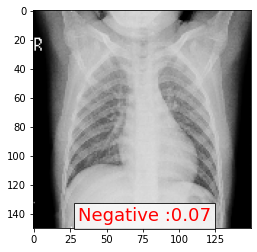

1/1 [==============================] - 0s 53ms/step


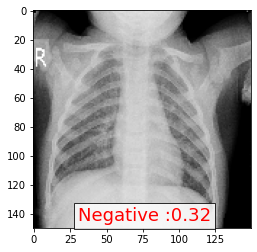

1/1 [==============================] - 0s 47ms/step


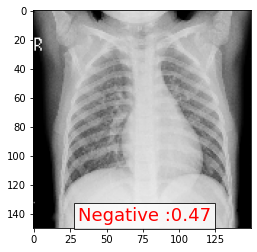

1/1 [==============================] - 0s 47ms/step


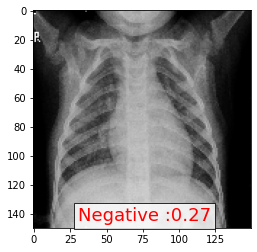

1/1 [==============================] - 0s 54ms/step


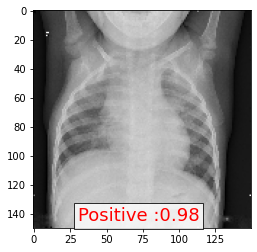

1/1 [==============================] - 0s 46ms/step


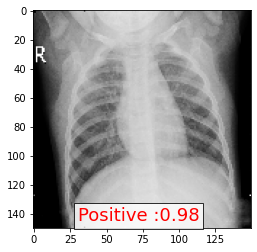

1/1 [==============================] - 0s 48ms/step


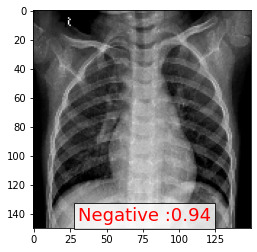

1/1 [==============================] - 0s 66ms/step


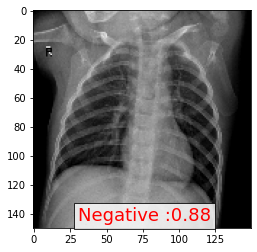

1/1 [==============================] - 0s 49ms/step


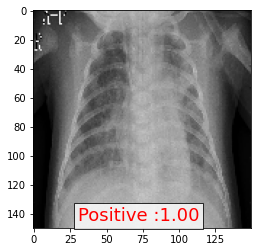

1/1 [==============================] - 0s 50ms/step


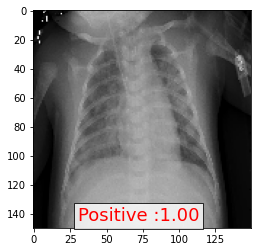

1/1 [==============================] - 0s 53ms/step


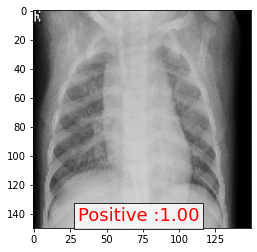

1/1 [==============================] - 0s 45ms/step


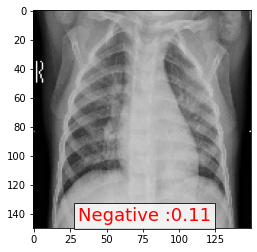

1/1 [==============================] - 0s 47ms/step


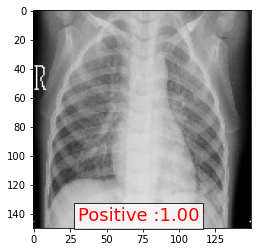

1/1 [==============================] - 0s 62ms/step


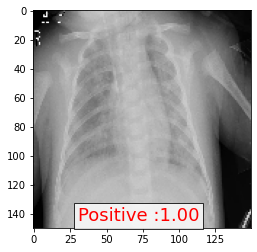

1/1 [==============================] - 0s 49ms/step


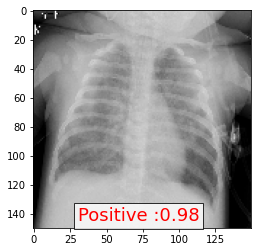

1/1 [==============================] - 0s 67ms/step


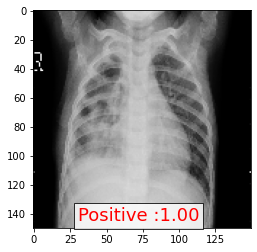

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

# Specify the folder path containing the images
folder_path = 'copd_resources/val/input/'
output_folder_path = 'copd_resources/val/output_predictions/'
csv_file_path = 'copd_resources/val/output_predictions/predictions.csv'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
with open(csv_file_path, mode='w', newline='') as csv_file:
    fieldnames = ['Patient Name', 'COPD Prediction']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Write the header row to the CSV file
    writer.writeheader()
    
    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for each in image_files:
        img1 = image.load_img(folder_path+each, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
        img = image.img_to_array(img1)
        img = img/255
        # create a batch of size 1 [N,H,W,C]
        img = np.expand_dims(img, axis=0)
        prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
        if(prediction[:,:]>0.95):
            value ='Positive :%1.2f'%(prediction[0,0])
            plt.text(30, 145,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
        else:
            value ='Negative :%1.2f'%(1.0-prediction[0,0])
            plt.text(30, 145,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
        writer.writerow({'Patient Name': each[:len(each)-5], 'COPD Prediction': value})
        plt.imshow(img1)
        output_file_path = os.path.join(output_folder_path, each)
        plt.savefig(output_file_path)
        plt.show()